In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

In [ ]:
# Life Style Data
# Data collection to do recommendations systems and App

In [63]:
dataset = pd.read_csv('life_style_data.csv')
print(dataset.shape)
dataset.head()

(20000, 54)


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [70]:
cooking_time = dataset[(dataset['cook_time_min'] >= 60) & (dataset['cook_time_min'] <= 100)]
print(cooking_time.shape)
cooking_time.head()

(6717, 54)


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
13,38.01,Female,57.67,1.56,184.91,132.43,54.04,1.64,2345.20,HIIT,...,2955.34,0.500396,2.562337,0.598991,0.716186,-619.20,42.332992,1110.4112,6.589948e+19,Medium
22,30.90,Female,76.77,1.71,189.88,137.20,51.88,1.27,1214.12,Cardio,...,1775.49,0.500617,1.162564,0.618261,0.722562,967.88,54.262106,897.7122,9.366365e+19,High
25,54.03,Female,87.22,1.76,188.72,157.91,68.00,1.48,1067.38,Yoga,...,2375.50,0.499886,1.357487,0.744781,0.836742,1201.62,62.433385,1001.3680,6.551887e+19,Medium
30,57.07,Female,76.90,1.86,173.05,140.94,55.07,1.15,827.31,Yoga,...,1659.36,0.499253,1.076853,0.727835,0.814447,1153.69,54.261093,813.9470,9.466411e+19,High
34,37.51,Male,76.59,1.82,191.56,121.30,49.83,1.49,1072.80,Yoga,...,1512.84,0.498823,0.997780,0.504269,0.633222,877.20,59.299362,1025.3286,7.522409e+19,Medium


In [71]:
fat_cook_time = cooking_time[(cooking_time['Fat_Percentage'] >= 30) & (cooking_time['Fat_Percentage'] <= 45)]
fat_cook_time = pd.to_numeric(cooking_time['Fat_Percentage'], errors='coerce')
age_cook_time = fat_cook_time.dropna()

q1 = fat_cook_time.quantile(0.25)
q3 = fat_cook_time.quantile(0.75)
iqr = q3 - q1
lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

age_cook_time = age_cook_time[(fat_cook_time >= lim_inf) & (fat_cook_time <= lim_sup)]
print(fat_cook_time.shape)
fat_cook_time.head()

(6717,)


13    26.594431
22    29.318607
25    28.418499
30    29.439411
34    22.575582
Name: Fat_Percentage, dtype: float64

In [72]:
# Medidas de Centralidade

media = np.mean(fat_cook_time)
mediana = np.median(fat_cook_time)
quartis = np.quantile(fat_cook_time, [0.25, 0.50, 0.75])
desvio_padrao = np.std(fat_cook_time)
variancia = np.var(fat_cook_time)

print(f"Média: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Quartis: {quartis}")
print(f"Desvio-Padrão: {desvio_padrao:.2f}")
print(f"Variância: {variancia:.2f}")

Média: 25.90
Mediana: 25.50
Quartis: [22.21034188 25.49589132 29.47272263]
Desvio-Padrão: 4.97
Variância: 24.67


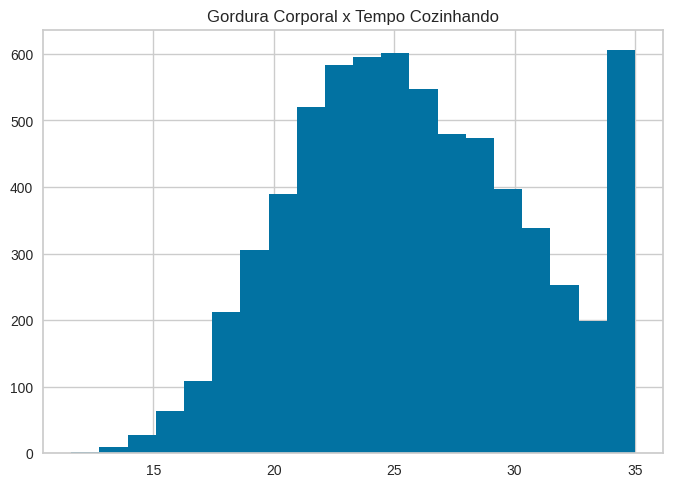

In [73]:
# Teste de Normalidade - Gráfico de Histograma

plt.hist(fat_cook_time, bins=20)
plt.title('Gordura Corporal x Tempo Cozinhando')
plt.show()


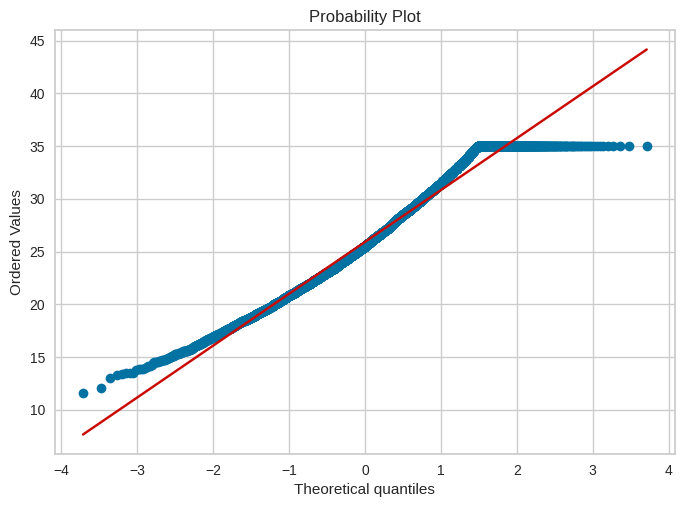

In [74]:
# Teste de Normailidade - Q-Q Plot

fig, ax = plt.subplots()
stats.probplot(fat_cook_time, fit=True,   plot=ax)
plt.show()

In [78]:
# Teste de Normalidade - Kolmogorov-Smirnov
# p > 0.05

stat, p = stats.kstest(fat_cook_time, 'norm')

print('p-valor', p)


p-valor 0.0


In [ ]:
# Pela análise do Histograma e do Q-Q Plot, deve ser verificado uma normalidade na distribuição dos dados em torno da média, apesar de o p = 0, no teste de Kolmogorov-Smirnov.

In [85]:
# Criação de um modelo para prevê a quantidade de horas cozinhando baseado no pratica de exercícios.

X = cooking_time['Physical exercise'].values
y = cooking_time['cook_time_min'].values
X

array([ 2.99,  1.01, -0.  , ...,  0.  , -0.01,  1.  ], shape=(6717,))

In [86]:
correlacao = np.corrcoef(X, y)
print(correlacao)
print(correlacao ** 2)

[[ 1.         -0.03086792]
 [-0.03086792  1.        ]]
[[1.00000000e+00 9.52828178e-04]
 [9.52828178e-04 1.00000000e+00]]


In [87]:
# Conclusão: Observa-se do modelo que não há uma correlção direta, ou uma correlação negativa muito fraca em pratica de exercícios e quantidade de horas cozinhando.

In [88]:
# Formato de matriz com uma coluna a mais
X = X.reshape(-1, 1)
# Criação do modelo e treinamento (fit indica que o treinamento deve ser executado)
modelo = LinearRegression()
modelo.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


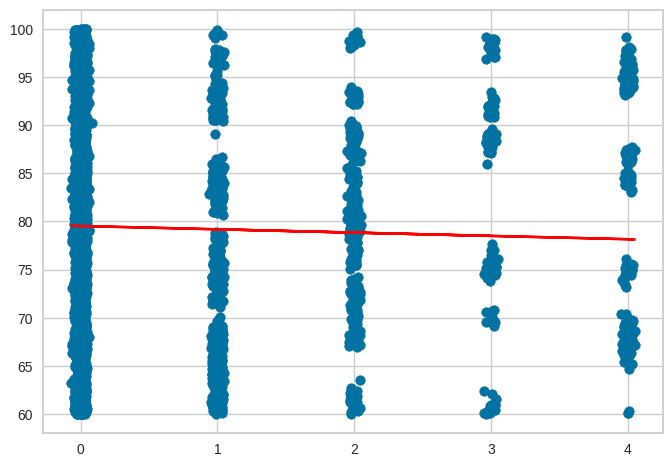

In [89]:
# Geração do gráfico com os pontos reais e as previsões
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')

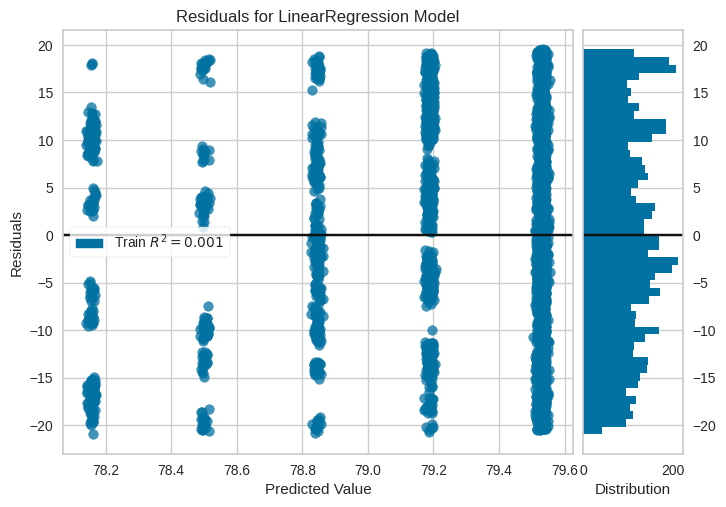

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [90]:
# Gráfico para visualizar os residuais
visualizador = ResidualsPlot(modelo)
visualizador.fit(X, y)
visualizador.poof()